# Machine Learning Assignment

## Problem Statement:

*Income is a gauge many use to determine the well-being of popullation of any country. It is a very important factor to determine a country's enconomy. With huge popullation and undocumented way of wage payment, in 
most of the cases the income calculation per individual is challenging.*

*The problem statement is to predict/classify whether a person's income exceeds $50K/yr based on census 
data.*

#### Problem Type : Binary Classification
#### Loss Function : Binary Log Loss
#### Metrics : accuracy, f1_score, precision, recall, roc_auc

*Prediction task is to determine whether a person makes over 50K a year.*

## Attribute Information:

Column Name|Information|
-----------|-----------|
        age|age of the person|
  workclass|working class they belong to (Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked)|
fnlwgt|continuous|
education|type of education (Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool)|
education-num|continuous|
marital-status|Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse|
occupation|Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces|
relationship|Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried|
race|White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black|
sex|Female, Male|
capital-gain|continuous|
capital-loss|continuous| 
hours-per-week|continuous|
native-country|United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands|

Attribute|Information|
------------|---------|
Data Set Characteristics |  Multivariate|
Number of Instances|48842|
Area|Social|
Attribute Characteristics|Categorical, Integer|
Number of Attributes|14|
Date Donated|1996-05-01|
Associated Tasks|Classification|
Missing Values?|Yes|
Number of Web Hits|2481482|

## 1. Load Libraries

In [134]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## 2. Data

In [135]:
## list of columns(with names) present in data
columnNames = ['age', 'workClass', 'fnlwgt', 'education', 'educationNum', 'maritalStatus', 
               'occupation', 'realtionship', 'race', 'sex', 'capitalGain', 'captialLoss', 
               'hoursPerWeek', 'nativeCountry', 'income']

trainDf = pd.read_csv("Income_survey.csv", header= 0, names = columnNames)

print(f"shape of the dataset: {trainDf.shape}")

trainDf.sample(5)

shape of the dataset: (32560, 15)


,age,workClass,fnlwgt,education,educationNum,maritalStatus,occupation,realtionship,race,sex,capitalGain,captialLoss,hoursPerWeek,nativeCountry,income
20025,48,Private,176917,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,55,United-States,<=50K
11030,38,Private,472604,Bachelors,13,Married-civ-spouse,Other-service,Husband,White,Male,0,0,35,Mexico,<=50K
13992,33,Private,159303,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
31350,41,Private,201981,HS-grad,9,Divorced,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
4287,66,?,160995,10th,6,Divorced,?,Not-in-family,White,Female,1086,0,20,United-States,<=50K


## 3. Information and Statistics

In [136]:
## Information of the data with respect to columns and datatypes
trainDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            32560 non-null  int64 
 1   workClass      32560 non-null  object
 2   fnlwgt         32560 non-null  int64 
 3   education      32560 non-null  object
 4   educationNum   32560 non-null  int64 
 5   maritalStatus  32560 non-null  object
 6   occupation     32560 non-null  object
 7   realtionship   32560 non-null  object
 8   race           32560 non-null  object
 9   sex            32560 non-null  object
 10  capitalGain    32560 non-null  int64 
 11  captialLoss    32560 non-null  int64 
 12  hoursPerWeek   32560 non-null  int64 
 13  nativeCountry  32560 non-null  object
 14  income         32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [137]:
trainDf.describe().round(2)

,age,fnlwgt,educationNum,capitalGain,captialLoss,hoursPerWeek
count,32560.00,32560.00,32560.00,32560.00,32560.00,32560.00
mean,38.58,189781.81,10.08,1077.62,87.31,40.44
std,13.64,105549.76,2.57,7385.40,402.97,12.35
min,17.00,12285.00,1.00,0.00,0.00,1.00
25%,28.00,117831.50,9.00,0.00,0.00,40.00
50%,37.00,178363.00,10.00,0.00,0.00,40.00
75%,48.00,237054.50,12.00,0.00,0.00,45.00
max,90.00,1484705.00,16.00,99999.00,4356.00,99.00


## 4. Data Cleaning

In [138]:
## 4.1 missing value analysis

## Found that rows which have missing values are present as " ?" 
for col in trainDf.columns:
    
    count = trainDf[trainDf[col] == " ?"].shape[0]
    
    if count > 0:
        print(f"column name : {col}, missing values : {count}")

column name : workClass, missing values : 1836
column name : occupation, missing values : 1843
column name : nativeCountry, missing values : 583


In [139]:
## replacing missing values with mode of each columns

missingColumnNames = ['workClass', 'occupation', 'nativeCountry']

for col in missingColumnNames:
    modeValue = trainDf["workClass"].mode()[0]
    trainDf[col] = trainDf[col].replace(" ?", modeValue)

In [140]:
## 4.2 duplicate data analysis
print(f"DuplicateRows in the dataset : {trainDf[trainDf.duplicated()].shape[0]}")

## get all duplicate rows
trainDf[trainDf.duplicated()]

DuplicateRows in the dataset : 24


,age,workClass,fnlwgt,education,educationNum,maritalStatus,occupation,realtionship,race,sex,capitalGain,captialLoss,hoursPerWeek,nativeCountry,income
4880,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5103,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9170,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11630,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13083,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15058,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17039,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18554,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,Private,<=50K
18697,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21317,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


**There are 24, We must remove them to avoid redundency.**

In [141]:
## drop all duplicate rows
trainDf = trainDf.drop_duplicates()

## shape after cleaning
print(f"Shape of the dataset after cleaning : {trainDf.shape}")

Shape of the dataset after cleaning : (32536, 15)


## 5. Output Column Analysis

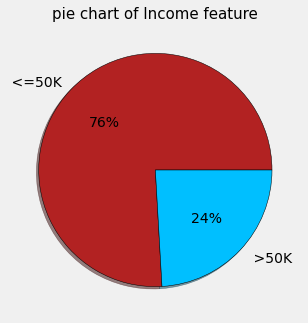

In [142]:
## get income disribution
data = trainDf['income'].value_counts().to_dict()

plt.figure(figsize=(5,5))

plt.pie(data.values(), labels = data.keys(), 
        wedgeprops={'edgecolor': 'black'}, 
        colors = ['#B22222', '#00BFFF'], 
        autopct='%.0f%%', shadow=True)

plt.title("pie chart of Income feature", fontsize=15)

plt.show()

## 6. Exploratory Data analysis

* exploratory data analysis refers to the crucial process of doing first investigations on data in order to uncover patterns, spot anomalies,test hypotheses, and check assumptions.*

### 6.1 Age

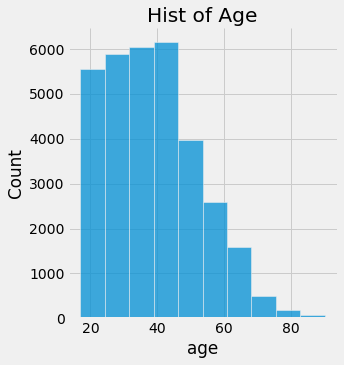

In [143]:
plot1 = sns.displot(trainDf['age'], bins = 10)

plt.title("Hist of Age")

plt.show()

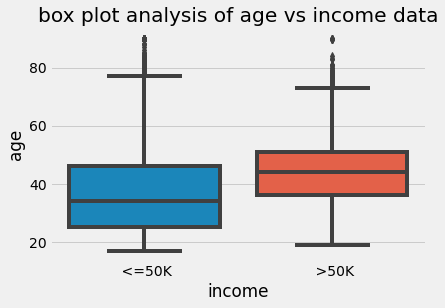

In [144]:
sns.boxplot(x="income", y="age", data=trainDf)

plt.title("box plot analysis of age vs income data")

plt.show()

### 6.2 workClass

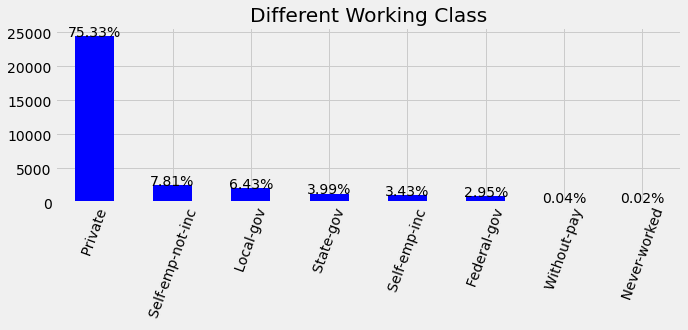

In [145]:
plt.figure(figsize=(10,3))

total = float(len(trainDf))

ax = trainDf['workClass'].value_counts().plot(kind = "bar", color='blue')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total)*100),
            ha="center") 

plt.title('Different Working Class')
plt.xticks(rotation=70)
    
plt.show()

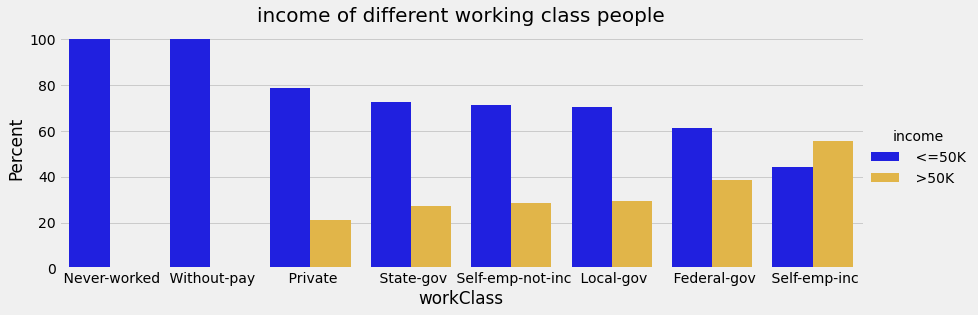

In [146]:
trainDf.sort_values(by = 'workClass').groupby('workClass')['income']\
        .value_counts(normalize=True).mul(100)\
        .rename('Percent')\
        .reset_index().sort_values(by = ['Percent'], ascending=False)\
        .pipe((sns.catplot,'data'), x= 'workClass',y='Percent',
              hue= 'income', kind='bar', palette = ['blue', '#fabf30'],
              height=4, aspect=3)

plt.title('income of different working class people', fontsize=20)
plt.show()

### 6.3 education/educationNum

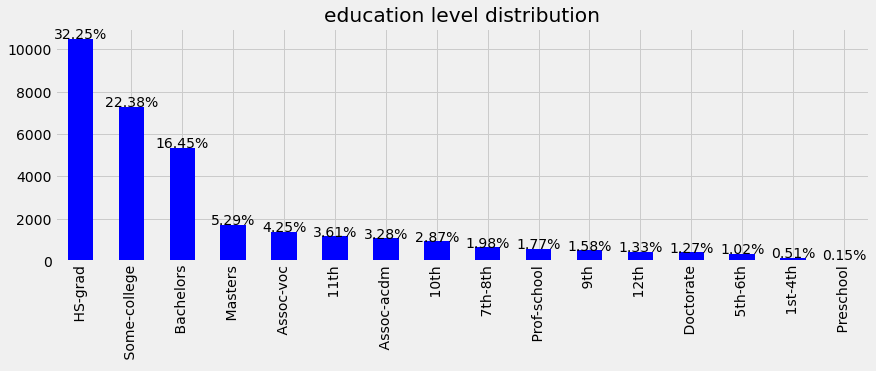

In [147]:
plt.figure(figsize=(13,4))

total = float(len(trainDf))

ax = trainDf['education'].value_counts().plot(kind = "bar", color='blue')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total)*100),
            ha="center") 
    
plt.title('education level distribution')
plt.show()

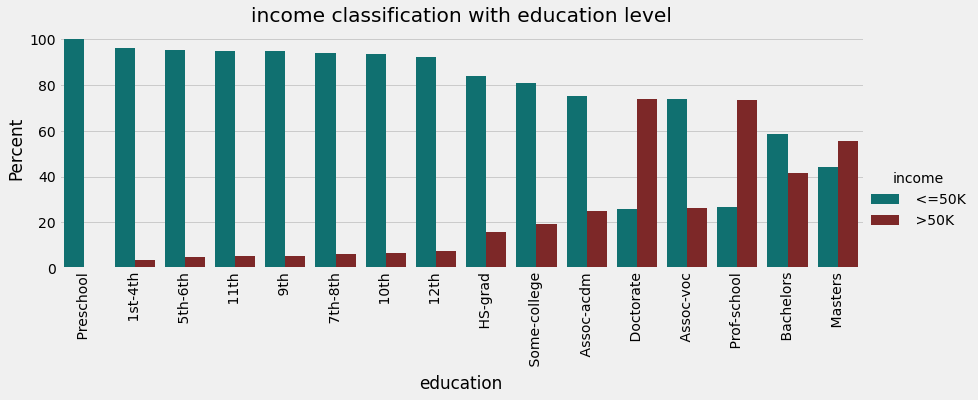

In [148]:
trainDf.sort_values(by = 'educationNum')\
.groupby(['educationNum', 'education'])['income']\
.value_counts(normalize=True).mul(100)\
.rename('Percent')\
.reset_index().sort_values(by = ['Percent'], ascending=False)\
.pipe((sns.catplot,'data'), x= 'education',y='Percent',
      hue= 'income', kind='bar', palette = ['teal', '#8B1A1A'],
     height=4, aspect=3)

plt.title('income classification with education level')
plt.xticks(rotation=90)

plt.show()

### 6.4 maritalStatus

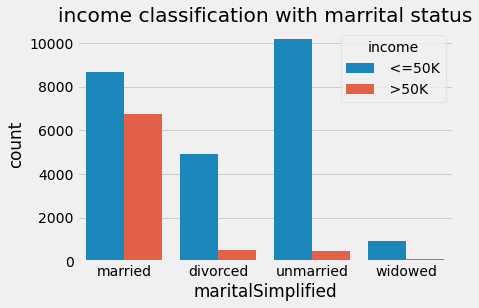

In [149]:
## converting marrital status into simplified values

maritalStatusRenaming = {' Never-married' : "unmarried", " Married-civ-spouse" : "married",
                         " Divorced" : "divorced", " Married-spouse-absent" : "married",
                         " Separated" : "divorced", " Married-AF-spouse" : "married",
                         " Widowed" : "widowed"}

trainDf['maritalSimplified'] = trainDf['maritalStatus'].map(maritalStatusRenaming)

sns.countplot(data = trainDf, x = 'maritalSimplified', hue = 'income')

plt.title("income classification with marrital status")

plt.show()

### 6.5 occupation

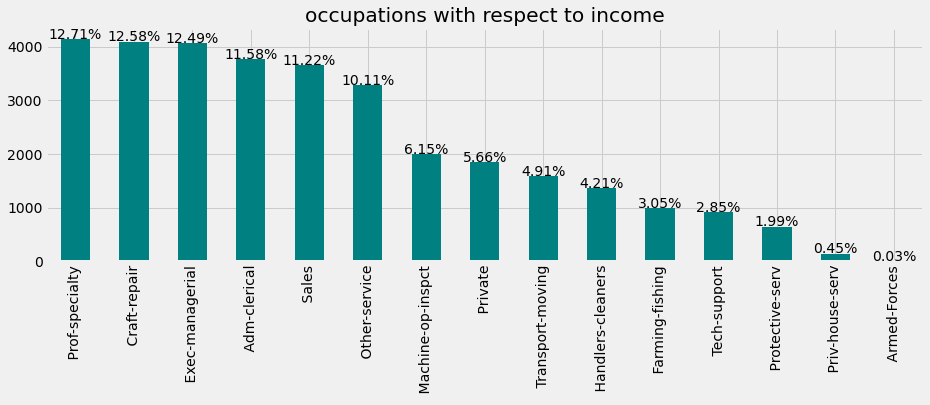

In [150]:
plt.figure(figsize=(14,4))

total = float(len(trainDf))

ax = trainDf['occupation'].value_counts().plot(kind = "bar", color='teal')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total)*100),
            ha="center") 

plt.title('occupations with respect to income')
plt.show()

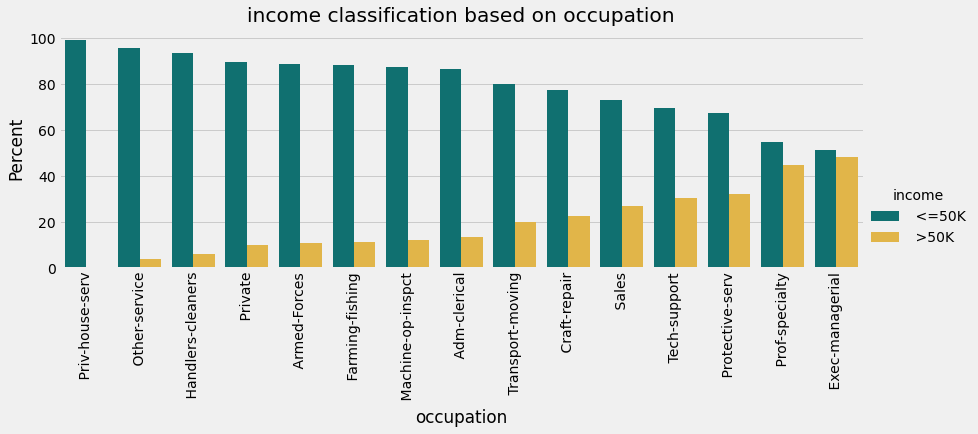

In [151]:
trainDf\
.groupby(['occupation'])['income']\
.value_counts(normalize=True).mul(100)\
.rename('Percent')\
.reset_index().sort_values(by = ['Percent'], ascending=False)\
.pipe((sns.catplot,'data'), x= 'occupation',y='Percent',
      hue= 'income', kind='bar',palette = ['teal', '#fabf30'],
     height=4, aspect=3)

plt.xticks(rotation=90)

plt.title('income classification based on occupation')

plt.show()

### 6.6 realtionship

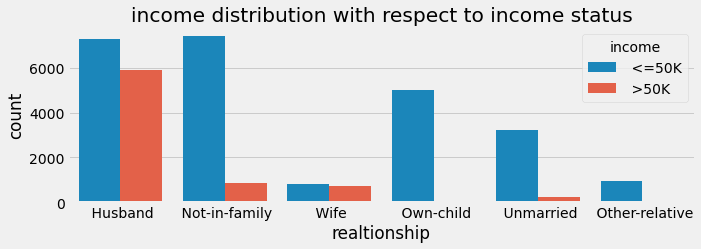

In [152]:

plt.figure(figsize=(10,3))

sns.countplot(data = trainDf, x = 'realtionship', hue = 'income')

plt.title("income distribution with respect to income status")
plt.show()

### 6.7 race

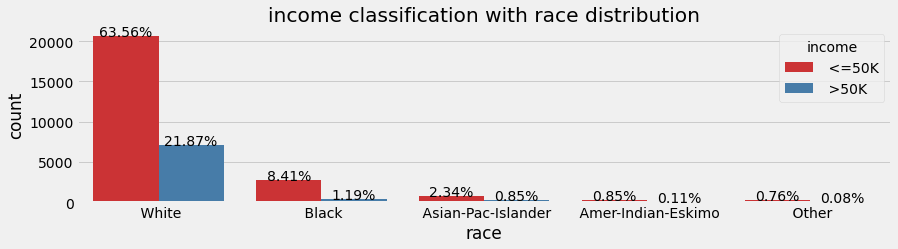

In [153]:
plt.figure(figsize=(13,3))

total = float(len(trainDf))

ax = sns.countplot(x="race", hue="income", data=trainDf, palette="Set1")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total)*100),
            ha="center") 
    
plt.title('income classification with race distribution')
plt.show()

### 6.8 gender

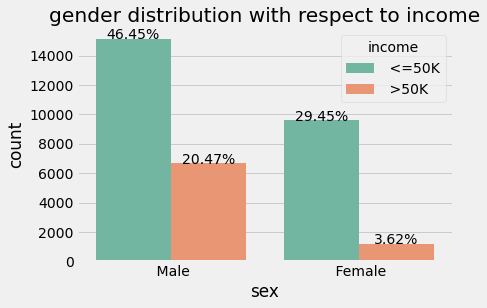

In [154]:
total = float(len(trainDf))

ax = sns.countplot(x="sex", hue="income", data=trainDf, palette="Set2")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total)*100),
            ha="center") 

plt.title('gender distribution with respect to income')
plt.show()

### 6.9 capitalGain

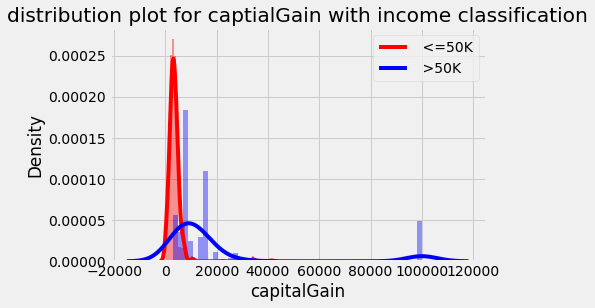

In [155]:
## filtering captialGain with more than 0

sns.distplot(trainDf[(trainDf["capitalGain"] > 0) &
                     (trainDf['income'] == " <=50K")]['capitalGain'], color = 'r')

sns.distplot(trainDf[(trainDf["capitalGain"] > 0) &
                     (trainDf['income'] == " >50K")]['capitalGain'], color = 'b')

plt.legend([" <=50K", " >50K"])
plt.title('distribution plot for captialGain with income classification')
plt.show()

### 6.10 capitalLoss

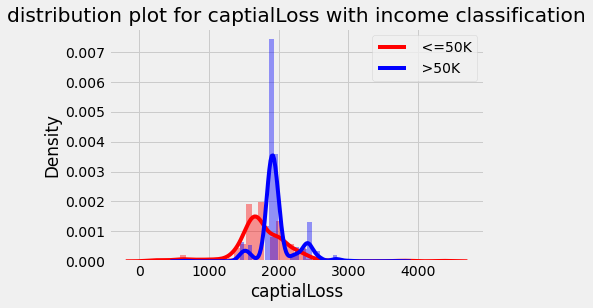

In [156]:
## filtering captialGain with more than 0

sns.distplot(trainDf[(trainDf["captialLoss"] > 0) &
                     (trainDf['income'] == " <=50K")]['captialLoss'], color = 'r')

sns.distplot(trainDf[(trainDf["captialLoss"] > 0) &
                     (trainDf['income'] == " >50K")]['captialLoss'], color = 'b')

plt.legend([" <=50K", " >50K"])
plt.title('distribution plot for captialLoss with income classification')
plt.show()

### 6.11 hoursPerWeek

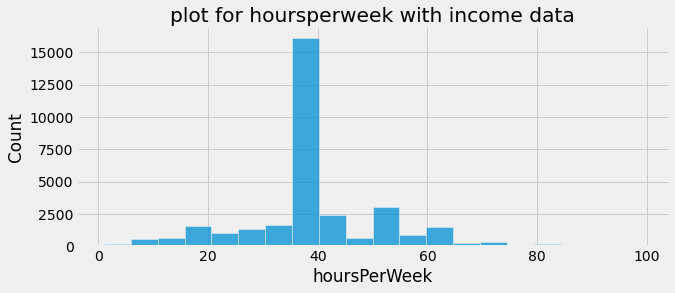

In [157]:
sns.displot(data = trainDf, x = 'hoursPerWeek',height=4, aspect=2.4, bins=20)

plt.title('plot for hoursperweek with income data')

plt.show()

### 6.14 Correlation 

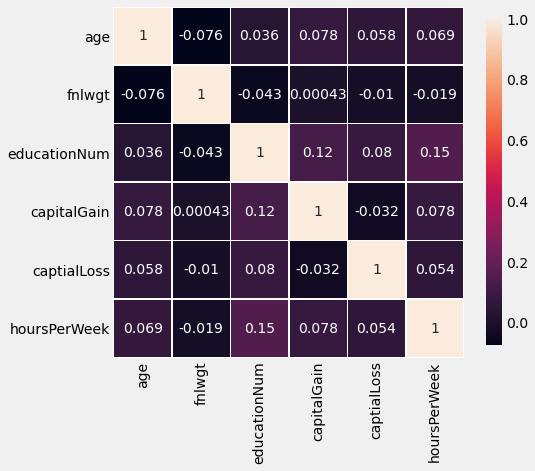

In [158]:
fig = plt.figure(figsize=(7,7)) ## setting up figure size

## heatmap for correation analysis
plot = sns.heatmap(trainDf.corr(), square = True, 
                   linewidths = .5, cbar_kws = {"shrink":0.8}, 
                   annot = True) 

## 7. DataPreprocessing

### 7.1 Data Splitting

In [159]:
from sklearn.model_selection import train_test_split

## split data
y = trainDf['income']
X = trainDf.drop(columns = ['income', 'education', 'nativeCountry', 'maritalStatus'])


xtrain, xtest, ytrain, ytest = train_test_split(X, y, stratify=y, test_size=0.20, random_state=42)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((26028, 12), (6508, 12), (26028,), (6508,))

### 7.2 Label Encoding

In [160]:
from sklearn.preprocessing import LabelEncoder

labelEncodingColumnList = ['workClass', 'occupation', 'realtionship']

for col in labelEncodingColumnList:
    
    enc = LabelEncoder() ## object of the encoder
    
    enc.fit(trainDf[[col]]) ## fitting of the input data
    
    ## transforming into encoded object
    xtrain[col] = enc.transform(xtrain[[col]]) 
    xtest[col] = enc.transform(xtest[[col]])

### 7.3 OneHot Encoding

In [161]:
from sklearn.preprocessing import OneHotEncoder

OneHotEncodingColumnList = ['race', 'sex', 'maritalSimplified']

for col in OneHotEncodingColumnList:
    
    enc = OneHotEncoder() ## object of the encoder
    
    enc.fit(trainDf[[col]]) ## fitting of the input data
    
    ## transforming train and test data into array format
    train_data = enc.transform(xtrain[[col]]).toarray()
    test_data = enc.transform(xtest[[col]]).toarray()
    
    ## get the category list of each column
    category_list = [i.lower().strip().replace("-", "_")for i in list((enc.categories_)[0])]
    
    ## creating one hot encoded columns
    for idx, category in enumerate(category_list):
        xtrain[col + "_" + category] = train_data[:, idx]
        xtest[col + "_" + category] = test_data[:, idx]
    
    ## drop original columns which is not encoded
    xtrain = xtrain.drop(columns = col)
    xtest = xtest.drop(columns = col)

### 7.4 Data Stardardization 

In [162]:
from sklearn.preprocessing import StandardScaler

## standard scaling of all numerical features
for col in xtrain.columns:
    
    enc = StandardScaler() ## object of the encoder
    
    enc.fit(xtrain[[col]]) ## fitting of the input data
    
    ## transforming into encoded object
    xtrain[col] = enc.transform(xtrain[[col]])
    xtest[col] = enc.transform(xtest[[col]])

### 7.5 Income Output Label Encoding

In [163]:
## output encoding
y_train = ytrain.map({" <=50K" : 0, " >50K":1})

y_test = ytest.map({" <=50K" : 0, " >50K":1})

## 8. Supervised Learning

## 8.1 Logistic Regression

In [164]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {'C' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
              'penalty' : ['l1', 'l2', 'elasticnet', None],
              'class_weight' : ['balanced', None]} 

hpTuning = GridSearchCV(LogisticRegression(), param_grid, scoring='f1')
hpTuning.fit(xtrain, y_train)

print("Best cross-validation score: {:.2f}".format(hpTuning.best_score_))
print("Best parameters: ", hpTuning.best_params_)

Best cross-validation score: 0.67
Best parameters:  {'C': 100, 'class_weight': 'balanced', 'penalty': 'l2'}


In [165]:
from sklearn.metrics import *
from mlxtend.plotting import plot_confusion_matrix

## training the model on best parameters
finalModel = hpTuning.best_estimator_
finalModel.fit(xtrain, y_train)

## predicting on test data
ytestPred = finalModel.predict(xtest)


accuracy_lr = accuracy_score(y_test, ytestPred).round(4) * 100
pre_lr = precision_score(y_test, ytestPred).round(4) * 100
rec_lr = recall_score(y_test, ytestPred).round(3) * 100
f1_lr = f1_score(y_test, ytestPred).round(4) * 100

print(f"Logistic Regression")
print(f"accuracy score : {accuracy_lr}")
print(f"precision score : {pre_lr}")
print(f"recall score : {rec_lr}")
print(f"f1 score : {f1_lr}")

Logistic Regression
accuracy score : 78.84
precision score : 53.879999999999995
recall score : 84.5
f1 score : 65.81


              precision    recall  f1-score   support

           0       0.94      0.77      0.85      4940
           1       0.54      0.85      0.66      1568

    accuracy                           0.79      6508
   macro avg       0.74      0.81      0.75      6508
weighted avg       0.84      0.79      0.80      6508



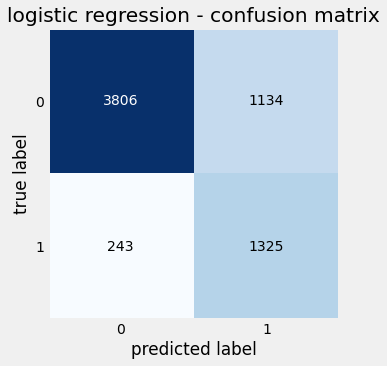

In [166]:
## classification report
print(classification_report(y_test, ytestPred))

## confusion matrix
plot_confusion_matrix(conf_mat = confusion_matrix(y_test, ytestPred), figsize=(5, 5))
plt.title("logistic regression - confusion matrix")
plt.show()

## 8.2 Naive Bayes

In [167]:
from sklearn.naive_bayes import GaussianNB

param_grid = {"var_smoothing" : np.logspace(0,-9, num=100)}

hpTuning = GridSearchCV(GaussianNB(), param_grid, scoring='f1')
hpTuning.fit(xtrain, y_train)

print("Best cross-validation score: {:.2f}".format(hpTuning.best_score_))
print("Best parameters: ", hpTuning.best_params_)

Best cross-validation score: 0.61
Best parameters:  {'var_smoothing': 0.0004328761281083057}


In [168]:
## training the model on best parameters
finalModelNB = hpTuning.best_estimator_
finalModelNB.fit(xtrain, y_train)

## predicting on test data
ytestPredNB = finalModelNB.predict(xtest)

accuracy_nb = accuracy_score(y_test, ytestPredNB).round(4) * 100
pre_nb = precision_score(y_test, ytestPredNB).round(4) * 100
rec_nb = recall_score(y_test, ytestPredNB).round(3) * 100
f1_nb = f1_score(y_test, ytestPredNB).round(4) * 100

print(f"Logistic Regression")
print(f"accuracy score : {accuracy_nb}")
print(f"precision score : {pre_nb}")
print(f"recall score : {rec_nb}")
print(f"f1 score : {f1_nb}")

Logistic Regression
accuracy score : 74.91
precision score : 48.75
recall score : 80.7
f1 score : 60.79


              precision    recall  f1-score   support

           0       0.92      0.73      0.82      4940
           1       0.49      0.81      0.61      1568

    accuracy                           0.75      6508
   macro avg       0.71      0.77      0.71      6508
weighted avg       0.82      0.75      0.77      6508



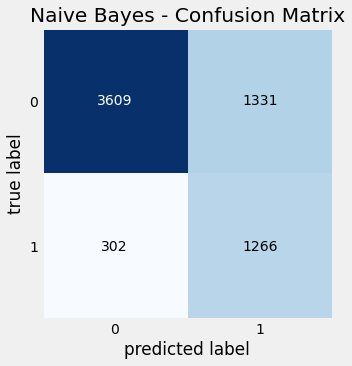

In [169]:
## get classification report
print(classification_report(y_test, ytestPredNB))

## confusion matrix
plot_confusion_matrix(conf_mat = confusion_matrix(y_test, ytestPredNB), figsize=(5, 5))
plt.title("Naive Bayes - Confusion Matrix")
plt.show()

## 8.3 Decision Tree

In [170]:
from sklearn.tree import DecisionTreeClassifier

## applying parameter grid to get optimal parameters during hp tuning
param_grid = {'criterion' : ['gini', 'entropy', 'log_loss'],
              "splitter" : ['best', 'random'],
              'max_depth': [4, 5, 7, 9, 11],
              'min_samples_split' : [2, 3, 4, 5],
              'min_samples_leaf' : [1, 3, 5]}

## n_jobs = -1 will use all the available core present in the system
hpTuning = GridSearchCV(DecisionTreeClassifier(class_weight='balanced'), 
                        param_grid,
                        scoring='f1',
                        n_jobs = -1)
hpTuning.fit(xtrain, y_train)

print(f"Best cross-validation score: {hpTuning.best_score_:.2f}")
print(f"Best parameters: {hpTuning.best_params_}")

Best cross-validation score: 0.67
Best parameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 2, 'splitter': 'best'}


In [171]:
## training the model on best parameters
finalModelDT = hpTuning.best_estimator_
finalModelDT.fit(xtrain, y_train)

## predicting on test data
ytestPredDT = finalModelDT.predict(xtest)

accuracy_dt = accuracy_score(y_test, ytestPredDT).round(4) * 100
pre_dt = precision_score(y_test, ytestPredDT).round(4) * 100
rec_dt = recall_score(y_test, ytestPredDT).round(3) * 100
f1_dt = f1_score(y_test, ytestPredDT).round(4) * 100

print(f"Decision Tree")
print(f"accuracy score : {accuracy_dt}")
print(f"precision score : {pre_dt}")
print(f"recall score : {rec_dt}")
print(f"f1 score : {f1_dt}")

Decision Tree
accuracy score : 80.84
precision score : 57.120000000000005
recall score : 82.1
f1 score : 67.38


              precision    recall  f1-score   support

           0       0.93      0.80      0.86      4940
           1       0.57      0.82      0.67      1568

    accuracy                           0.81      6508
   macro avg       0.75      0.81      0.77      6508
weighted avg       0.85      0.81      0.82      6508



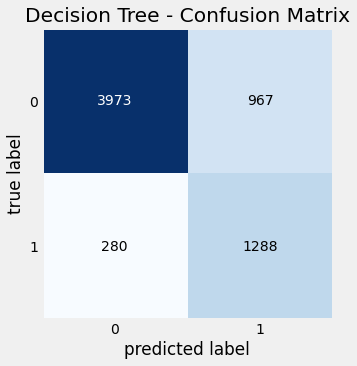

In [172]:
## get classification report
print(classification_report(y_test, ytestPredDT))

plot_confusion_matrix(conf_mat = confusion_matrix(y_test, ytestPredDT), figsize=(5, 5))
plt.title("Decision Tree - Confusion Matrix")
plt.show()

## 9. Model Comparison

In [173]:
model_names = ['logistic_regression', 'naive_bayes', 'decision_tree']
accuracy_scores = [accuracy_lr, accuracy_nb, accuracy_dt]
f1_scores = [f1_lr, f1_nb, f1_dt]
precision_scores = [pre_lr, pre_nb, pre_dt]
recall_scores = [rec_lr,rec_nb, rec_dt]

dframe_final = pd.DataFrame()
dframe_final['model_name'] = model_names
dframe_final['accuracy'] = accuracy_scores
dframe_final['f1'] = f1_scores
dframe_final['precision'] = precision_scores
dframe_final['recall'] = recall_scores

dframe_final

,model_name,accuracy,f1,precision,recall
0,logistic_regression,78.84,65.81,53.88,84.5
1,naive_bayes,74.91,60.79,48.75,80.7
2,decision_tree,80.84,67.38,57.12,82.1


## 10. Unsupervised Modelling

## KMeans Clustering

*As we can see we have 14 genuine feature for clustering. But including all feature may not add importance to the clustering model. We must select optimal features to cluster the dataset, and to reach a concequence of income level.*

In [174]:
## selecting below features which has an impact to the income classification
## age, workClass, educationNum, occupation, capitalGain, captialLoss, hoursPerWeek 
trainDf1 = trainDf[["age", "workClass", "educationNum", "occupation", "capitalGain", 
                    "captialLoss", "hoursPerWeek", 'income']]

print(f"shape of selected dataset {trainDf1.shape}")

trainDf1 = trainDf1.reset_index(drop=True)
trainDf2 = trainDf1.copy()

shape of selected dataset (32536, 8)


### 10.1 Encoding

In [175]:
labelEncodingColumnList = ['workClass', 'occupation']
for col in labelEncodingColumnList:
    ## object of the encoder
    enc = LabelEncoder()
    ## fitting and transforming data
    trainDf2[col] = enc.fit_transform(trainDf2[[col]])
    
for col in trainDf2.columns[0:-1]:
    enc = StandardScaler()
    ## fitting and transforming data
    trainDf2[col] = enc.fit_transform(trainDf2[[col]])
    
## get the datapoints
xData = trainDf2.drop(columns = 'income').values

### 10.2 KMeans Clustering

In [176]:
## applying k means clustering on the dataset 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from tqdm.notebook import tqdm

ssList = [] ## list of append sum of squared error
silhouetteCoefficients = [] ## list to append silhouette coefficient

for cluster in tqdm(range(2,21,1)):
    
    ## creating model object
    model = KMeans(init = 'k-means++', n_clusters = cluster)
    model.fit(xData) ## training the model
    
    ## adding sum of squared error
    ssList.append(model.inertia_)
    
    ## adding silhouette score 
    score = silhouette_score(xData, model.labels_)
    silhouetteCoefficients.append(score)

  0%|          | 0/19 [00:00<?, ?it/s]

### 10.3 Validation Curves

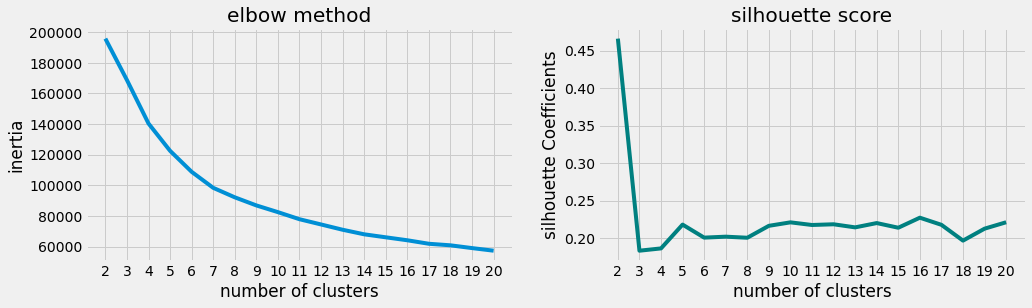

In [131]:
plt.figure(figsize=(15,4))

## elbow method
plt.subplot(1,2,1)
plt.plot(range(2,21), ssList)
plt.xticks(range(2,21))
plt.title("elbow method")
plt.xlabel("number of clusters")
plt.ylabel('inertia')

## silhouette score plotting
plt.subplot(1,2,2)
plt.plot(range(2,21), silhouetteCoefficients, color = 'teal')
plt.xticks(range(2,21))
plt.title("silhouette score")
plt.xlabel("number of clusters")
plt.ylabel('silhouette Coefficients')

plt.show()

### 10.4 Selecting Best Method

In [132]:
## optmial cluster using silhouette method
model = KMeans(init = 'k-means++', n_clusters = 2)
model.fit(xData) ## training the model

## label mapping into the actual dataset
trainDf1['labels_ss'] = model.labels_
trainDf1['labels_ss'].value_counts()

trainDf2['labels_ss'] = model.labels_
trainDf2['labels_ss'].value_counts()

1    31052
0     1484
Name: labels_ss, dtype: int64

### 10.5 Model Validation

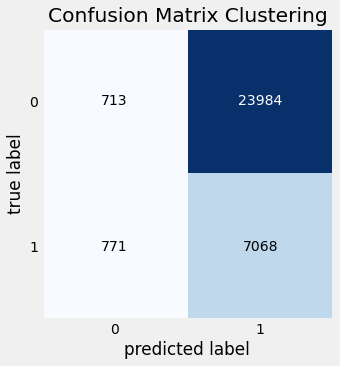

In [133]:
## confusion matrix
trainDf2['label'] = trainDf2['income'].map({' <=50K' : 0, ' >50K': 1})
plot_confusion_matrix(conf_mat = confusion_matrix(trainDf2['label'], trainDf2['labels_ss']), figsize=(5, 5))
plt.title("Confusion Matrix Clustering")
plt.show()

### 10.6 Clustering Output

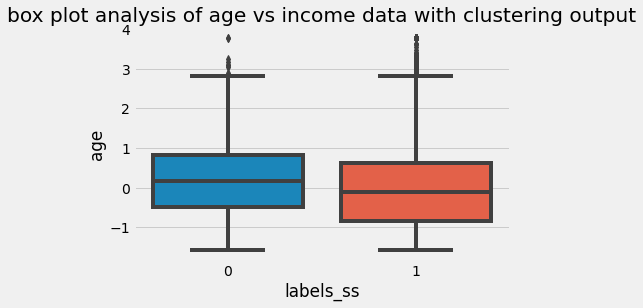

In [47]:
sns.boxplot(x="labels_ss", y="age", data=trainDf2)
plt.title("box plot analysis of age vs income data with clustering output")
plt.show()

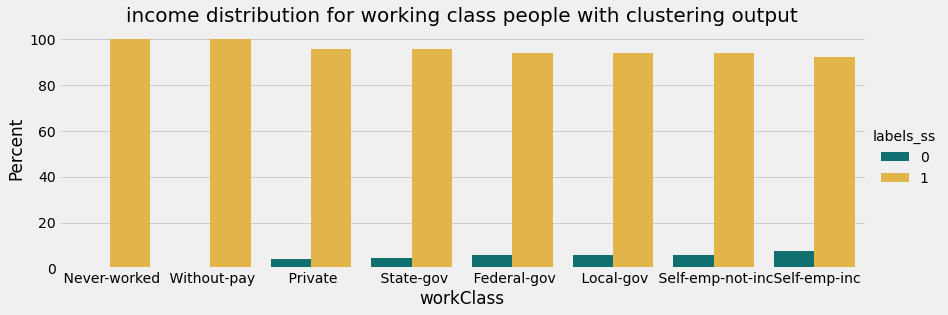

In [48]:
trainDf1.sort_values(by = 'workClass').groupby('workClass')['labels_ss']\
        .value_counts(normalize=True).mul(100)\
        .rename('Percent')\
        .reset_index().sort_values(by = ['Percent'], ascending=False)\
        .pipe((sns.catplot,'data'), x= 'workClass',y='Percent',
              hue= 'labels_ss', kind='bar', palette = ['teal', '#fabf30'],
              height=4, aspect=3)

plt.title('income distribution for working class people with clustering output', fontsize=20)
plt.show()